In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import lightgbm as lgb
import warnings


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

#### transaction_date = satış verilerinin tarihi
#### merchant_id = üye iş yerlerinin id'leri (Her bir üye iş yeri için eşsiz numara)
#### total_transaction = işlem sayısı
#### Category = Üye iş yerlerinin kategorileri
#### Total_paid = Ödeme miktarı 

In [364]:
df = pd.read_csv("iyzico_data.csv")

In [365]:
def check_df(dataframe, head=5):
    print("################# SHAPE #################")
    print(dataframe.shape)
    print("################# TYPES #################")
    print(dataframe.dtypes)
    print("################# HEAD #################")
    print(dataframe.head(head))
    print("################# TAİL #################")
    print(dataframe.tail(head))
    print("################# NA #################")
    print(dataframe.isna().sum())
    print("################# QUANTİLES #################")
    # Sadece sayısal sütunların kuantillerini hesaplayın
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
    print(dataframe[numeric_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [366]:
check_df(df) 

################# SHAPE #################
(7667, 5)
################# TYPES #################
Unnamed: 0             int64
transaction_date      object
merchant_id            int64
Total_Transaction      int64
Total_Paid           float64
dtype: object
################# HEAD #################
   Unnamed: 0 transaction_date  merchant_id  Total_Transaction  Total_Paid
0           0       2018-01-01          535                349   25883.226
1           1       2018-01-01        42616                141   40918.860
2           2       2018-01-01        46774                410  306902.700
3           3       2018-01-01        86302                 10      11.340
4           4       2018-01-01       124381                285  111383.766
################# TAİL #################
      Unnamed: 0 transaction_date  merchant_id  Total_Transaction   Total_Paid
7662        7662       2020-12-31        46774               3394  3174751.332
7663        7663       2020-12-31        57192           

In [367]:
df['transaction_date'].dtype # tarih sütunu şuan da object mi değil mi diye kontrol ediyoruz.

dtype('O')

In [368]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [369]:
df['transaction_date'].dtype 

dtype('<M8[ns]')

In [370]:
df["transaction_date"].head(1)

#df["transaction_date"].min()

0   2018-01-01
Name: transaction_date, dtype: datetime64[ns]

In [371]:
df["transaction_date"].tail(1)

#df["transaction_date"].max()

7666   2020-12-31
Name: transaction_date, dtype: datetime64[ns]

In [372]:
df["merchant_id"].unique() # 7 tane iş yerinin her üye için toplam işlem sayıları.

array([   535,  42616,  46774,  86302, 124381, 129316,  57192])

In [373]:
df.groupby('merchant_id').agg({"Total_Transaction": ["sum", "mean", "median", "std"]})


Total_Transaction                                  
                          sum         mean  median          std
merchant_id                                                    
535                   1302725  1188.617701  1029.5   498.632545
42616                 1126191  1027.546533   667.0  1780.256295
46774                 1599559  1459.451642  1313.5   844.590010
57192                 1146440  1050.815765  1073.0   215.100847
86302                  840951   767.291058   160.0  1127.961928
124381                1935357  1765.836679   816.5  2245.710163
129316                 440029   401.486314   383.0   210.782976

In [374]:
df["Total_Paid"].sum() # 3.558.840.563 toplam ödenen miktar.

df["Total_Transaction"].sum() # 8.391.252 kez işlem yapılmış.

np.int64(8391252)

In [375]:
df.groupby('merchant_id').agg({"Total_Paid": ["sum", "mean", "median", "std"]})

Total_Paid                                         
                      sum          mean       median           std
merchant_id                                                       
535          1.566015e+08  1.428846e+05   132031.134  6.009672e+04
42616        3.545831e+08  3.235247e+05   187385.580  6.510790e+05
46774        1.567200e+09  1.429927e+06  1238197.617  9.040563e+05
57192        3.173371e+08  2.908681e+05   286297.506  1.083085e+05
86302        2.870447e+06  2.619021e+03      404.010  4.041142e+03
124381       1.158693e+09  1.057201e+06   478098.891  1.369114e+06
129316       1.555471e+06  1.419226e+03     1219.725  8.655815e+02

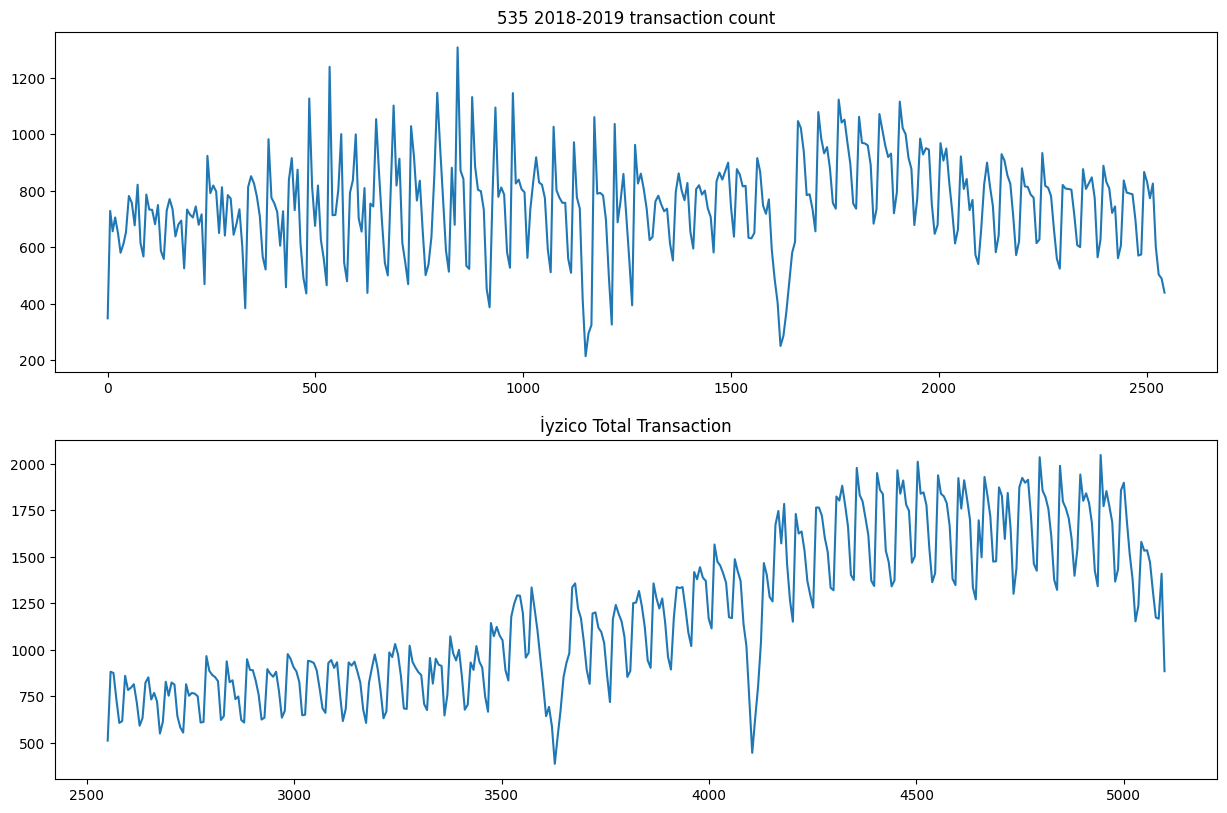

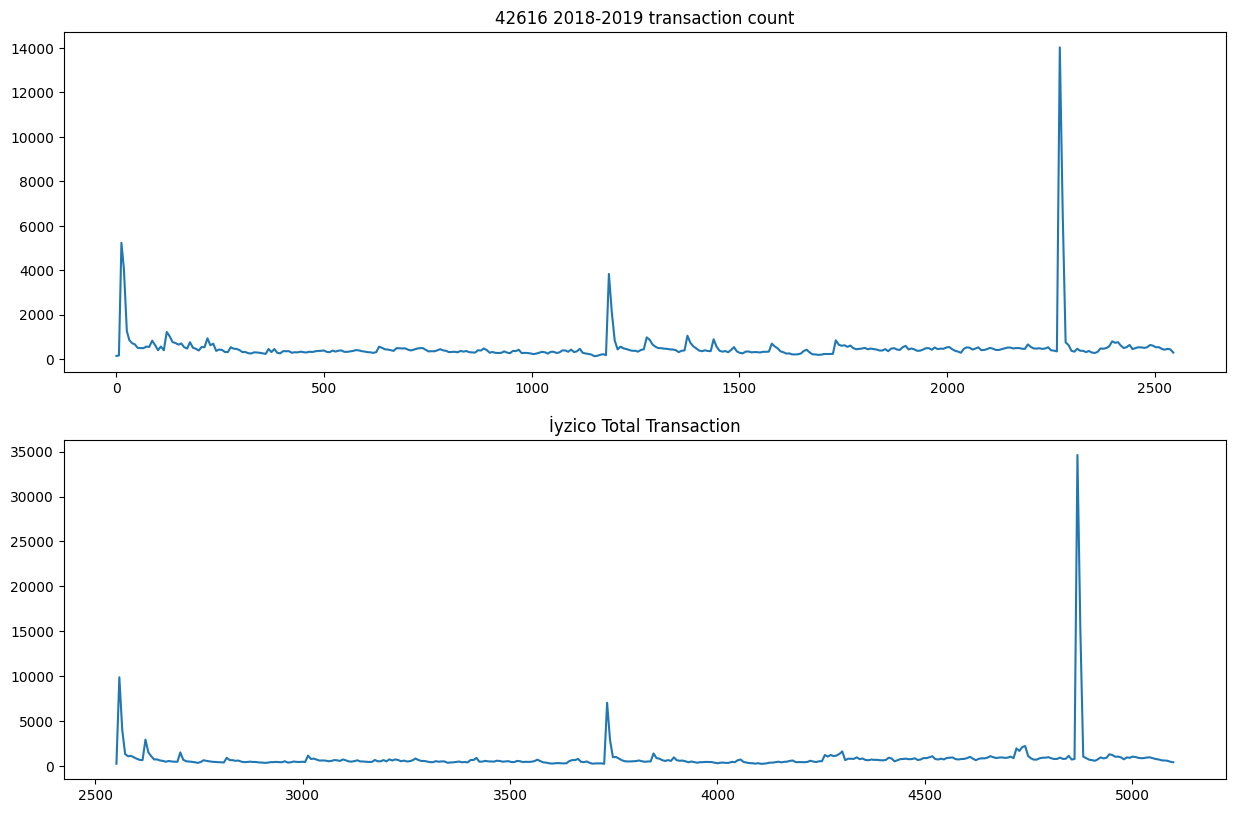

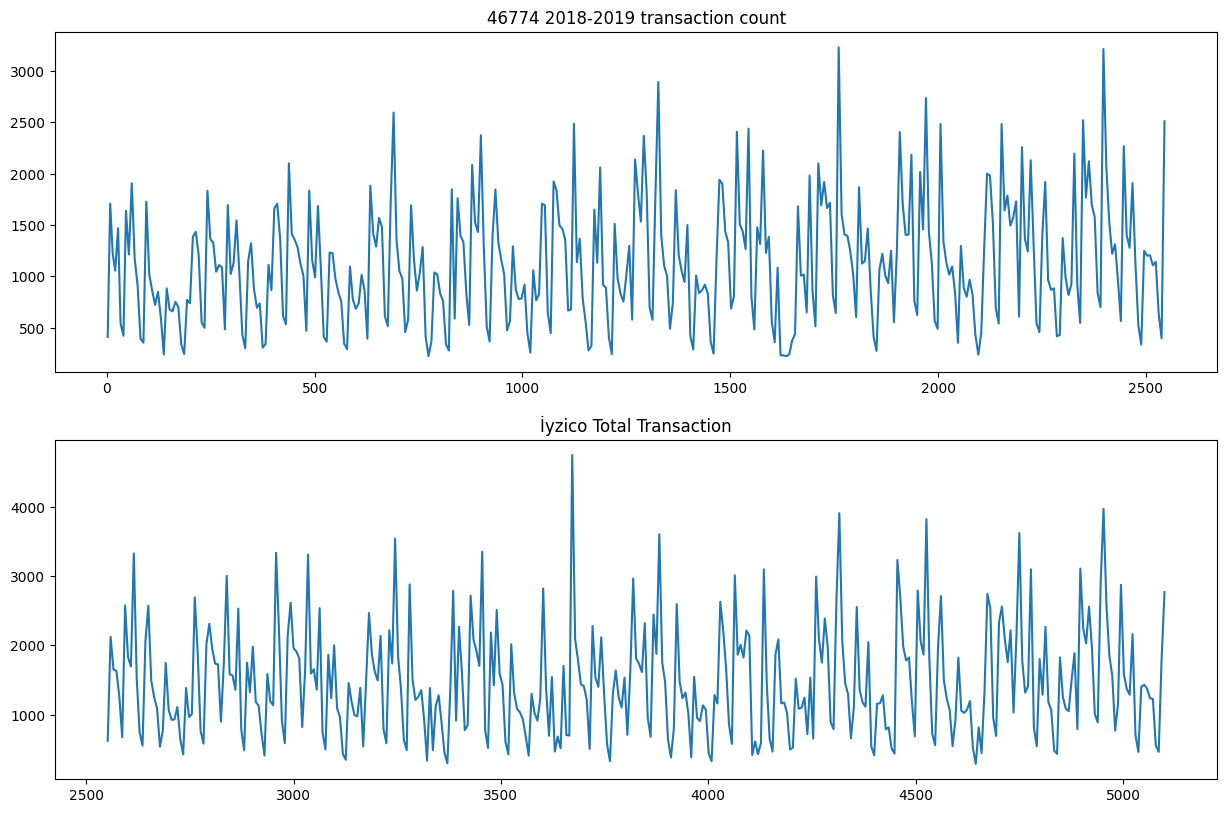

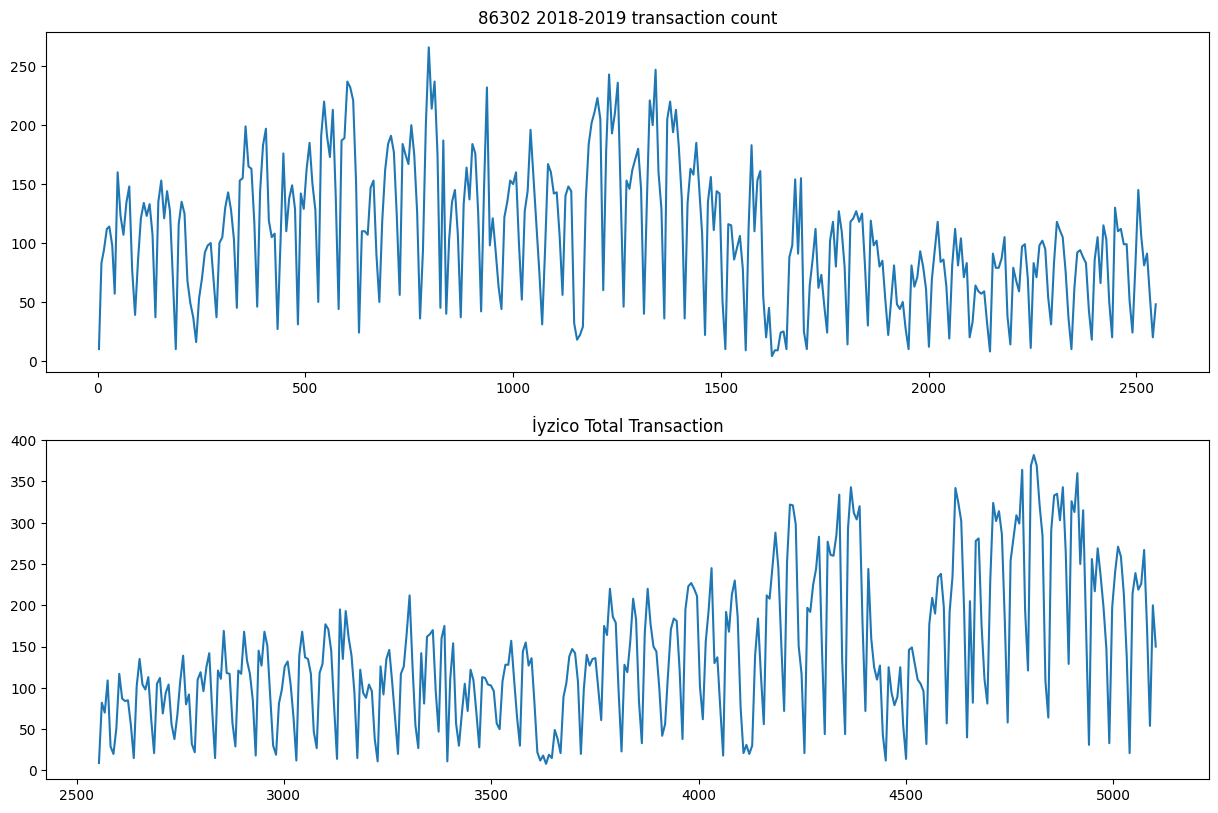

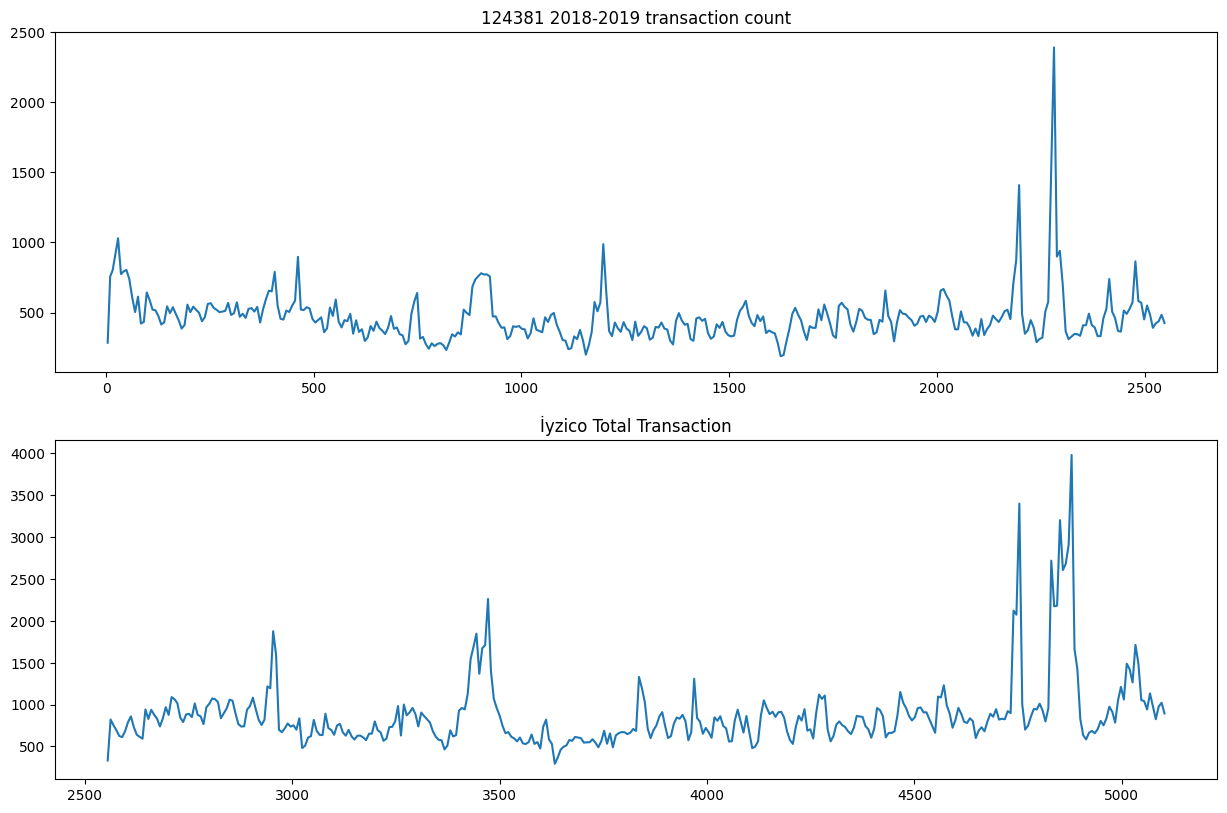

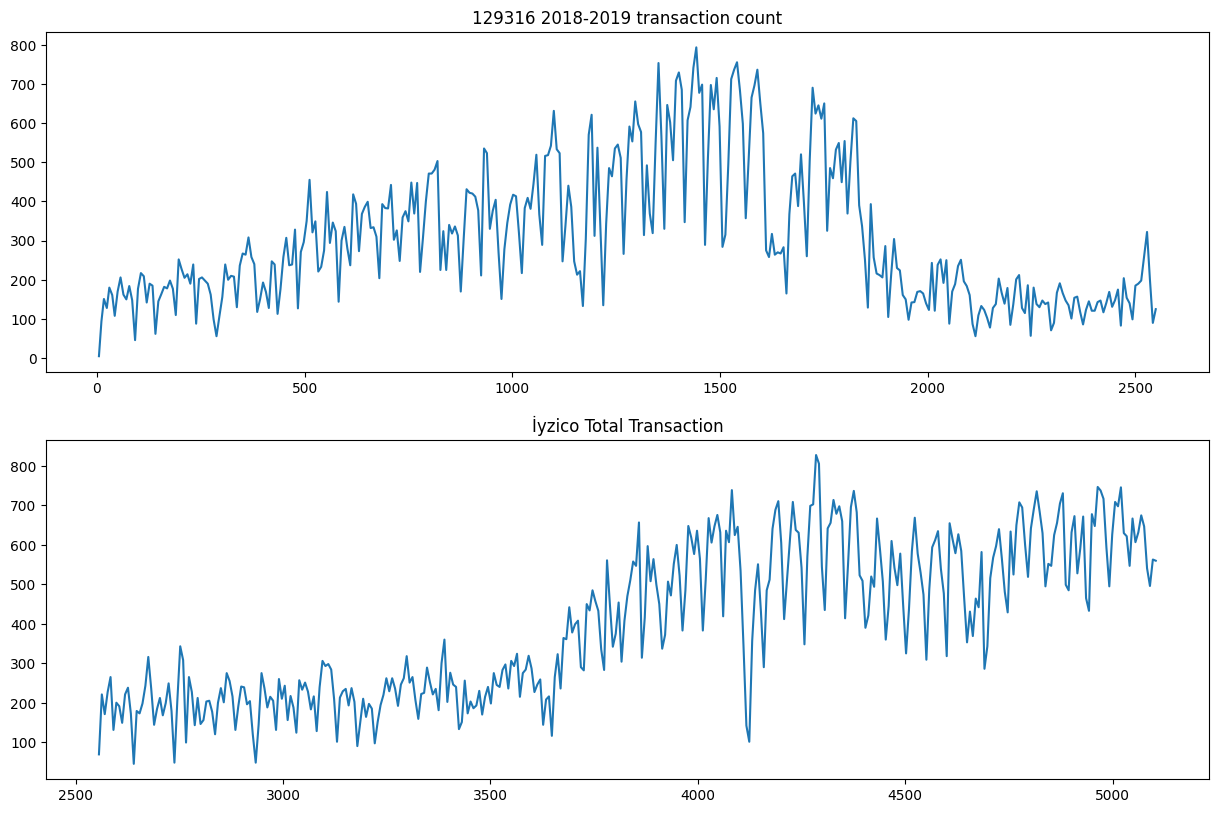

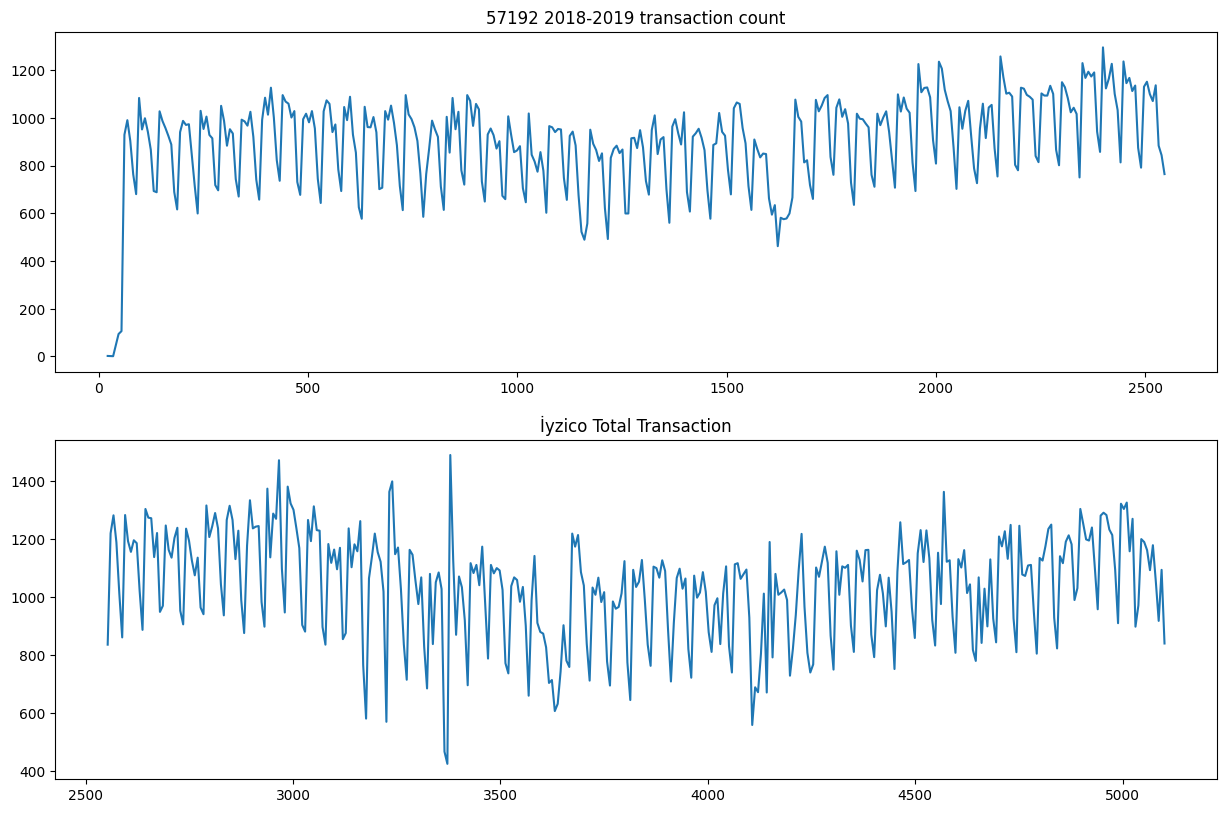

In [376]:
for id in df["merchant_id"].unique():

    plt.figure(figsize=(15,15))
    plt.subplot(3,1,1, title=str(id) + " " + '2018-2019 transaction count')
    df[(df.merchant_id == id) & (df.transaction_date >= '2018-01-01') & (df.transaction_date < '2019-01-01')]["Total_Transaction"].plot()
    plt.xlabel("")
    plt.subplot(3,1,2, title=str(id) + " " + '2019-2020 transaction count')
    df[(df.merchant_id == id) & (df.transaction_date >= '2019-01-01') & (df.transaction_date < '2020-01-01')]["Total_Transaction"].plot()
    plt.xlabel("")

    plt.title("İyzico Total Transaction")
    plt.show()


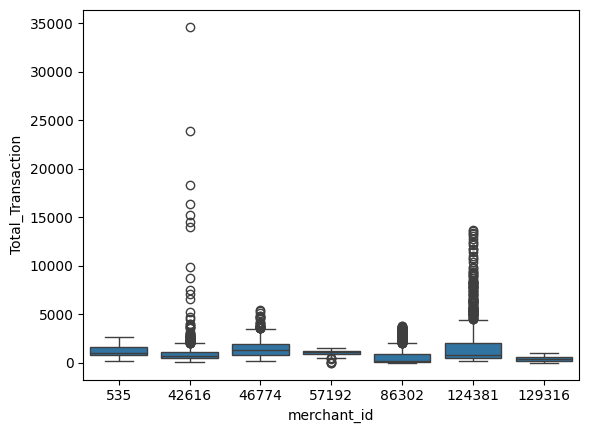

In [377]:
sns.boxplot(data = df, x = df["merchant_id"], y = df["Total_Transaction"])
plt.show(block=True)

In [378]:
dolar = pd.read_csv("ABD Dolar Endeksi Geçmiş Verileri.csv")

In [379]:
check_df(dolar)

################# SHAPE #################
(784, 7)
################# TYPES #################
Tarih      object
Şimdi      object
Açılış     object
Yüksek     object
Düşük      object
Hac.      float64
Fark %     object
dtype: object
################# HEAD #################
        Tarih  Şimdi Açılış Yüksek  Düşük  Hac.  Fark %
0  31.12.2020  89,94  89,61  89,98  89,52   NaN   0,29%
1  30.12.2020  89,68  89,98  89,98  89,56   NaN  -0,35%
2  29.12.2020  89,99  90,21  90,23  89,85   NaN  -0,38%
3  28.12.2020  90,34  90,22  90,38  89,98   NaN   0,02%
4  25.12.2020  90,32  90,33  90,42  90,21   NaN   0,00%
################# TAİL #################
          Tarih  Şimdi Açılış Yüksek  Düşük  Hac.  Fark %
779  05.01.2018  91,95  91,87  92,10  91,78   NaN   0,11%
780  04.01.2018  91,85  92,22  92,26  91,80   NaN  -0,34%
781  03.01.2018  92,16  91,82  92,26  91,81   NaN   0,32%
782  02.01.2018  91,87  92,24  92,25  91,75   NaN  -0,41%
783  01.01.2018  92,25  92,29  92,32  92,18   NaN  -0,04%
#

In [380]:
dolar["Tarih"] = dolar["Tarih"].apply(pd.to_datetime)

In [381]:
dolar["Tarih"].dtypes

dtype('<M8[ns]')

In [382]:
dolar.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2020-12-31,"89,94","89,61","89,98","89,52",NaN,"0,29%"
1,2020-12-30,"89,68","89,98","89,98","89,56",NaN,"-0,35%"
2,2020-12-29,"89,99","90,21","90,23","89,85",NaN,"-0,38%"
3,2020-12-28,"90,34","90,22","90,38","89,98",NaN,"0,02%"
4,2020-12-25,"90,32","90,33","90,42","90,21",NaN,"0,00%"


In [383]:
dolar.columns = dolar.columns.str.replace('Tarih', 'transaction_date')

In [384]:
dolar.head()

,transaction_date,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2020-12-31,"89,94","89,61","89,98","89,52",NaN,"0,29%"
1,2020-12-30,"89,68","89,98","89,98","89,56",NaN,"-0,35%"
2,2020-12-29,"89,99","90,21","90,23","89,85",NaN,"-0,38%"
3,2020-12-28,"90,34","90,22","90,38","89,98",NaN,"0,02%"
4,2020-12-25,"90,32","90,33","90,42","90,21",NaN,"0,00%"


In [385]:
df = df.merge(dolar, how='outer', on='transaction_date')

In [386]:
df

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,0,2018-01-01,535,349,25883.226,"92,25","92,29","92,32","92,18",NaN,"-0,04%"
1,1,2018-01-01,42616,141,40918.860,"92,25","92,29","92,32","92,18",NaN,"-0,04%"
2,2,2018-01-01,46774,410,306902.700,"92,25","92,29","92,32","92,18",NaN,"-0,04%"
3,3,2018-01-01,86302,10,11.340,"92,25","92,29","92,32","92,18",NaN,"-0,04%"
4,4,2018-01-01,124381,285,111383.766,"92,25","92,29","92,32","92,18",NaN,"-0,04%"
...,...,...,...,...,...,...,...,...,...,...,...
7662,7662,2020-12-31,46774,3394,3174751.332,"89,94","89,61","89,98","89,52",NaN,"0,29%"
7663,7663,2020-12-31,57192,856,337696.020,"89,94","89,61","89,98","89,52",NaN,"0,29%"
7664,7664,2020-12-31,86302,2657,10461.006,"89,94","89,61","89,98","89,52",NaN,"0,29%"
7665,7665,2020-12-31,124381,3668,2445655.950,"89,94","89,61","89,98","89,52",NaN,"0,29%"


In [387]:
df.drop(["Açılış","Yüksek","Düşük","Hac.","Fark %","Şimdi"], axis = 1, inplace = True)

In [388]:
df

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,0,2018-01-01,535,349,25883.226
1,1,2018-01-01,42616,141,40918.860
2,2,2018-01-01,46774,410,306902.700
3,3,2018-01-01,86302,10,11.340
4,4,2018-01-01,124381,285,111383.766
...,...,...,...,...,...
7662,7662,2020-12-31,46774,3394,3174751.332
7663,7663,2020-12-31,57192,856,337696.020
7664,7664,2020-12-31,86302,2657,10461.006
7665,7665,2020-12-31,124381,3668,2445655.950


In [389]:
# Feature Engineering

def create_date_features(df):
    df["month"] = df.transaction_date.dt.month
    df["day_of_month"] = df.transaction_date.dt.day
    df["day_of_year"] = df.transaction_date.dt.dayofyear
    df["week_of_year"] = df.transaction_date.dt.isocalendar().week
    df["day_of_week"] = df.transaction_date.dt.dayofweek
    df["year"] = df.transaction_date.dt.year
    df["is_wknd"] = df.transaction_date.dt.weekday // 4
    df["is_month_start"] = df.transaction_date.dt.is_month_start.astype(int)
    df["is_month_end"] = df.transaction_date.dt.is_month_end.astype(int)

    return df

create_date_features(df)

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,0,2018-01-01,535,349,25883.226,1,1,1,1,0,2018,0,1,0
1,1,2018-01-01,42616,141,40918.860,1,1,1,1,0,2018,0,1,0
2,2,2018-01-01,46774,410,306902.700,1,1,1,1,0,2018,0,1,0
3,3,2018-01-01,86302,10,11.340,1,1,1,1,0,2018,0,1,0
4,4,2018-01-01,124381,285,111383.766,1,1,1,1,0,2018,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,7662,2020-12-31,46774,3394,3174751.332,12,31,366,53,3,2020,0,0,1
7663,7663,2020-12-31,57192,856,337696.020,12,31,366,53,3,2020,0,0,1
7664,7664,2020-12-31,86302,2657,10461.006,12,31,366,53,3,2020,0,0,1
7665,7665,2020-12-31,124381,3668,2445655.950,12,31,366,53,3,2020,0,0,1


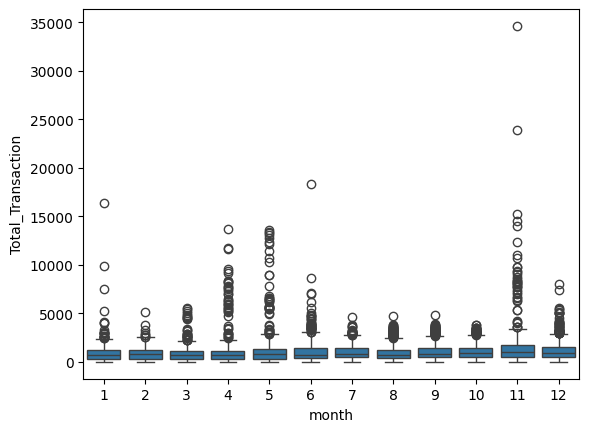

In [390]:
sns.boxplot(data = df, x = df["month"], y = df["Total_Transaction"])
plt.show(block=True)

# kasım ayında daha çok işlem olmuş 

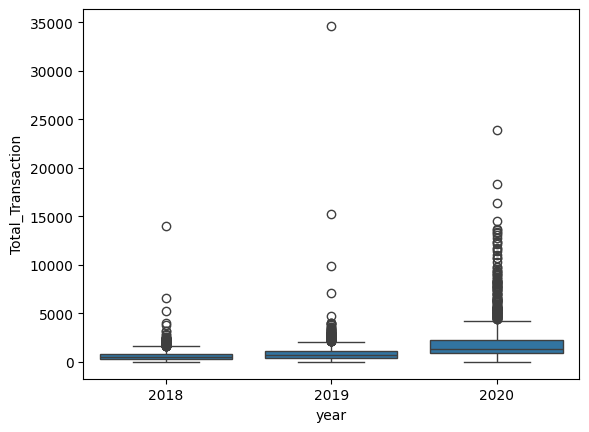

In [391]:
sns.boxplot(data = df, x = df["year"], y = df["Total_Transaction"])
plt.show(block=True)

# 2019 ve 2020 deki yükselip azalmalar korona sebebiyle oluştu muhtemelen


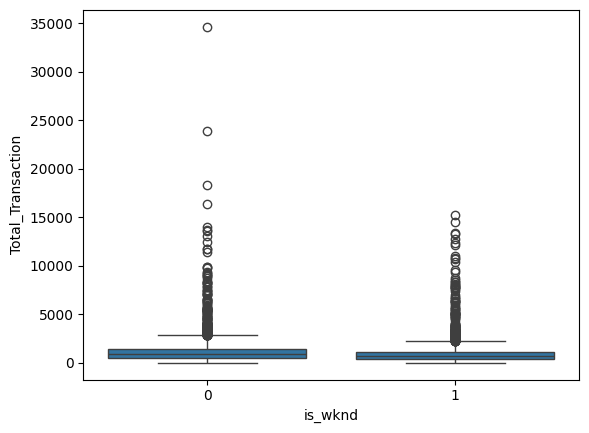

In [392]:
sns.boxplot(data = df, x = df["is_wknd"], y = df["Total_Transaction"])
plt.show(block=True)

# Hafta içi yapılan işlem hacimlerinin hafta sonuna göre yükske olduğunu kolaylıkla görebilmekteyiz.


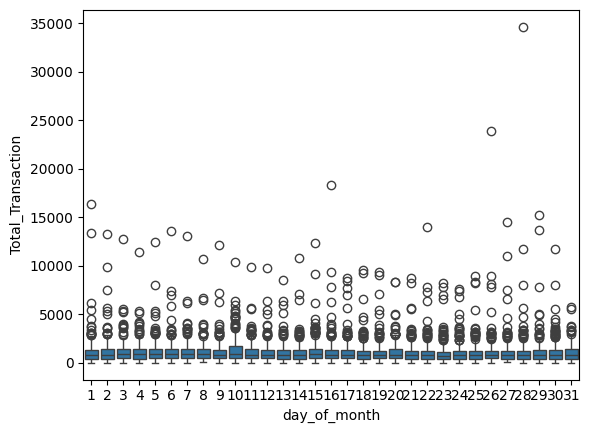

In [393]:
sns.boxplot(data = df, x = df["day_of_month"], y = df["Total_Transaction"])
plt.show(block=True)

# ayın 10. 15. ve 16. günlerde hacim daha fazla bu da muhtemelen özel ve memur maaş günleriyle alakalı.

In [394]:
df.sort_values(by=['merchant_id', 'transaction_date'], axis=0).head()


,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,0,2018-01-01,535,349,25883.226,1,1,1,1,0,2018,0,1,0
6,6,2018-01-02,535,729,60263.928,1,2,2,1,1,2018,0,0,0
12,12,2018-01-03,535,657,51071.994,1,3,3,1,2,2018,0,0,0
18,18,2018-01-04,535,706,56995.110,1,4,4,1,3,2018,0,0,0
25,25,2018-01-05,535,648,66689.352,1,5,5,1,4,2018,1,0,0


In [395]:
pd.DataFrame({"Total_Transaction": df["Total_Paid"].values[0:10],
            "lag1": df["Total_Transaction"].shift(1).values[0:10],
            "lag2": df["Total_Transaction"].shift(2).values[0:10],
            "lag3": df["Total_Transaction"].shift(3).values[0:10],
            "lag4": df["Total_Transaction"].shift(4).values[0:10],})

,Total_Transaction,lag1,lag2,lag3,lag4
0,25883.226,NaN,NaN,NaN,NaN
1,40918.860,349.0,NaN,NaN,NaN
2,306902.700,141.0,349.0,NaN,NaN
3,11.340,410.0,141.0,349.0,NaN
4,111383.766,10.0,410.0,141.0,349.0
5,15.750,285.0,10.0,410.0,141.0
6,60263.928,5.0,285.0,10.0,410.0
7,48332.772,729.0,5.0,285.0,10.0
8,1431591.822,162.0,729.0,5.0,285.0
9,144.774,1708.0,162.0,729.0,5.0


In [396]:
def random_noise(df):
    return np.random.normal(scale=1.6,size=(len(df),))

def lag_features(df,lags):
    for lag in lags:
        df["sales_lag" + str(lag)] = df.groupby(["merchant_id"])["Total_Transaction"].transform(
            lambda x : x.shift(lag)) + random_noise(df) 
    return df

df = lag_features(df, [91, 120, 152, 182, 242, 402, 542, 722])



In [397]:
df.tail()

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,sales_lag91,sales_lag120,sales_lag152,sales_lag182,sales_lag242,sales_lag402,sales_lag542,sales_lag722
7662,7662,2020-12-31,46774,3394,3174751.332,12,31,366,53,3,2020,0,0,1,2898.426790,2273.145299,731.510042,2061.159520,690.615823,1827.890011,2442.673486,1697.529599
7663,7663,2020-12-31,57192,856,337696.020,12,31,366,53,3,2020,0,0,1,1239.524356,1198.665581,884.485985,1170.865782,1343.951705,1140.069775,1106.589199,1155.731757
7664,7664,2020-12-31,86302,2657,10461.006,12,31,366,53,3,2020,0,0,1,3068.042857,3577.105549,2204.957825,2218.520213,1958.734100,291.662786,166.732439,85.921632
7665,7665,2020-12-31,124381,3668,2445655.950,12,31,366,53,3,2020,0,0,1,2296.594877,2751.242398,1562.818986,3707.751886,12759.916329,3202.281657,693.632167,856.728978
7666,7666,2020-12-31,129316,485,2101.050,12,31,366,53,3,2020,0,0,1,682.638804,562.936263,338.407153,479.066891,116.613905,547.018734,415.501981,151.274559


In [398]:
pd.DataFrame({'Total_Transaction': df['Total_Transaction'].values[0:10],
              "roll2": df['Total_Transaction'].shift(1).rolling(window=2).mean().values[0:10],
              "roll3": df['Total_Transaction'].shift(1).rolling(window=3).mean().values[0:10],
              "roll5": df['Total_Transaction'].shift(1).rolling(window=5).mean().values[0:10]})



def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby(["merchant_id"])['Total_Transaction']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe


df = roll_mean_features(df, [91, 120, 152, 182, 242, 402, 542, 722])

In [399]:
pd.DataFrame({"'Total_Transaction'": df['Total_Paid'].values[0:10],
              "roll2": df['Total_Transaction'].shift(1).rolling(window=2).mean().values[0:10],
              "ewm099": df['Total_Transaction'].shift(1).ewm(alpha=0.99).mean().values[0:10],
              "ewm095": df['Total_Transaction'].shift(1).ewm(alpha=0.95).mean().values[0:10],
              "ewm07": df['Total_Transaction'].shift(1).ewm(alpha=0.7).mean().values[0:10],
              "ewm02": df['Total_Transaction'].shift(1).ewm(alpha=0.1).mean().values[0:10]})

def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby("merchant_id")['Total_Transaction'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe


alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91, 120, 152, 182, 242, 402, 542, 722]

df = ewm_features(df, alphas, lags)


check_df(df)

################# SHAPE #################
(7667, 70)
################# TYPES #################
Unnamed: 0                             int64
transaction_date              datetime64[ns]
merchant_id                            int64
Total_Transaction                      int64
Total_Paid                           float64
                                   ...      
sales_ewm_alpha_05_lag_182           float64
sales_ewm_alpha_05_lag_242           float64
sales_ewm_alpha_05_lag_402           float64
sales_ewm_alpha_05_lag_542           float64
sales_ewm_alpha_05_lag_722           float64
Length: 70, dtype: object
################# HEAD #################
   Unnamed: 0 transaction_date  merchant_id  Total_Transaction  Total_Paid  month  day_of_month  day_of_year  week_of_year  day_of_week  year  is_wknd  is_month_start  is_month_end  sales_lag91  sales_lag120  sales_lag152  sales_lag182  sales_lag242  sales_lag402  sales_lag542  sales_lag722  sales_roll_mean_91  sales_roll_mean_120  sales_rol

In [400]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols
cat_cols

Observations: 7667
Variables: 70
cat_cols: 6
num_cols: 64
cat_but_car: 0
num_but_cat: 6


['merchant_id',
 'day_of_week',
 'year',
 'is_wknd',
 'is_month_start',
 'is_month_end']

In [401]:
df.head()
df = pd.get_dummies(df, columns=['day_of_week','year'])
df.shape

(7667, 78)

In [402]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False


In [403]:
df['Total_Transaction'] = np.log1p(df["Total_Transaction"].values)

In [404]:
df.columns

Index(['Unnamed: 0', 'transaction_date', 'merchant_id', 'Total_Transaction', 'Total_Paid', 'month', 'day_of_month', 'day_of_year', 'week_of_year', 'is_wknd', 'is_month_start', 'is_month_end', 'sales_lag91', 'sales_lag120', 'sales_lag152', 'sales_lag182', 'sales_lag242', 'sales_lag402', 'sales_lag542', 'sales_lag722', 'sales_roll_mean_91', 'sales_roll_mean_120', 'sales_roll_mean_152', 'sales_roll_mean_182', 'sales_roll_mean_242', 'sales_roll_mean_402', 'sales_roll_mean_542',
       'sales_roll_mean_722', 'sales_ewm_alpha_095_lag_91', 'sales_ewm_alpha_095_lag_120', 'sales_ewm_alpha_095_lag_152', 'sales_ewm_alpha_095_lag_182', 'sales_ewm_alpha_095_lag_242', 'sales_ewm_alpha_095_lag_402', 'sales_ewm_alpha_095_lag_542', 'sales_ewm_alpha_095_lag_722', 'sales_ewm_alpha_09_lag_91', 'sales_ewm_alpha_09_lag_120', 'sales_ewm_alpha_09_lag_152', 'sales_ewm_alpha_09_lag_182', 'sales_ewm_alpha_09_lag_242', 'sales_ewm_alpha_09_lag_402', 'sales_ewm_alpha_09_lag_542',
       'sales_ewm_alpha_09_lag_722'

In [405]:
train = df.loc[(df["transaction_date"] < "2020-01-01"), :]

In [424]:
# Sütun adlarını düzenleme
train.columns = train.columns.str.replace(r'[^\w]', '_', regex=True).str.lower()


In [425]:
val = df.loc[(df["transaction_date"] >= "2020-01-01") & (df["transaction_date"] < "2020-04-01"), :]

In [426]:
cols = [col for col in train.columns if col not in ["transaction_date", "Total_Transaction", "Total_Paid","year"]]

In [427]:
Y_train = train["Total_Transaction"]
X_train = train[cols]

KeyError: 'Total_Transaction'

In [428]:
y_val = val["Total_Transaction"]
x_val = val[cols]

KeyError: 'Total_Transaction'

In [429]:
lgb_params = {'num_leaves' : 10,
              'learning_rate' : 0.02,
              'feature_fraction' : 0.8,
              'max_depth' : 5,
              'verbose': 0,
              'num_boost_round': 1000, ## ÖNEMLİ
              'early_stopping_rounds' : 200,
              'nthread' : -1 }

In [430]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train,feature_name=cols)
lgbval = lgb.Dataset(data=x_val,label=y_val,reference=lgbtrain,feature_name=cols)

In [431]:
df.columns = df.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_').str.lower()


In [432]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

lgbval = lgb.Dataset(data=x_val, label=y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  feval=lgbm_smape,
                  callbacks=[
                            lgb.early_stopping(stopping_rounds=lgb_params['early_stopping_rounds']),
                            lgb.log_evaluation(period=100)  # Burada 'verbose_eval' yerine 'log_evaluation' kullanıyoruz
                  ] 
                
                )
y_pred_val = model.predict(x_val, num_iteration=model.best_iteration)

smape(np.expm1(y_pred_val), np.expm1(y_val))

ValueError: Length of feature_name(77) and num_feature(75) don't match

In [433]:
df

,unnamed_0,transaction_date,merchant_id,total_transaction,total_paid,month,day_of_month,day_of_year,week_of_year,is_wknd,is_month_start,is_month_end,sales_lag91,sales_lag120,sales_lag152,sales_lag182,sales_lag242,sales_lag402,sales_lag542,sales_lag722,sales_roll_mean_91,sales_roll_mean_120,sales_roll_mean_152,sales_roll_mean_182,sales_roll_mean_242,sales_roll_mean_402,sales_roll_mean_542,sales_roll_mean_722,sales_ewm_alpha_095_lag_91,sales_ewm_alpha_095_lag_120,sales_ewm_alpha_095_lag_152,sales_ewm_alpha_095_lag_182,sales_ewm_alpha_095_lag_242,sales_ewm_alpha_095_lag_402,sales_ewm_alpha_095_lag_542,sales_ewm_alpha_095_lag_722,sales_ewm_alpha_09_lag_91,sales_ewm_alpha_09_lag_120,sales_ewm_alpha_09_lag_152,sales_ewm_alpha_09_lag_182,sales_ewm_alpha_09_lag_242,sales_ewm_alpha_09_lag_402,sales_ewm_alpha_09_lag_542,sales_ewm_alpha_09_lag_722,sales_ewm_alpha_08_lag_91,sales_ewm_alpha_08_lag_120,sales_ewm_alpha_08_lag_152,sales_ewm_alpha_08_lag_182,sales_ewm_alpha_08_lag_242,sales_ewm_alpha_08_lag_402,sales_ewm_alpha_08_lag_542,sales_ewm_alpha_08_lag_722,sales_ewm_alpha_07_lag_91,sales_ewm_alpha_07_lag_120,sales_ewm_alpha_07_lag_152,sales_ewm_alpha_07_lag_182,sales_ewm_alpha_07_lag_242,sales_ewm_alpha_07_lag_402,sales_ewm_alpha_07_lag_542,sales_ewm_alpha_07_lag_722,sales_ewm_alpha_05_lag_91,sales_ewm_alpha_05_lag_120,sales_ewm_alpha_05_lag_152,sales_ewm_alpha_05_lag_182,sales_ewm_alpha_05_lag_242,sales_ewm_alpha_05_lag_402,sales_ewm_alpha_05_lag_542,sales_ewm_alpha_05_lag_722,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2018,year_2019,year_2020
0,0,2018-01-01,535,5.857933,25883.226,1,1,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False,False
1,1,2018-01-01,42616,4.955827,40918.860,1,1,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False,False
2,2,2018-01-01,46774,6.018593,306902.700,1,1,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False,False
3,3,2018-01-01,86302,2.397895,11.340,1,1,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False,False
4,4,2018-01-01,124381,5.655992,111383.766,1,1,1,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,7662,2020-12-31,46774,8.130059,3174751.332,12,31,366,53,0,0,1,2898.426790,2273.145299,731.510042,2061.159520,690.615823,1827.890011,2442.673486,1697.529599,1970.069889,1908.621123,1873.359695,1841.150434,1796.213007,1746.941651,1705.119459,1619.346303,2920.864712,2296.320867,787.721834,2087.354956,696.871432,1758.734067,2357.855753,1706.421445,2933.507068,2317.714854,840.91081